In [23]:
from dell_runtime import DellRuntimeProvider
from dell_runtime import BackendProvider

In [24]:
import numpy as np


# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

In [25]:
provider = BackendProvider()
provider.backends()
backend = provider.get_backend(name="emulator")
backend_config = backend.configuration()
backend_config.backend_name

'emulator'

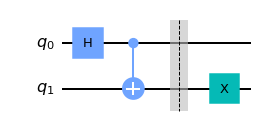

In [26]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.barrier(0,1)
qc.x(1)
qc.draw('mpl')

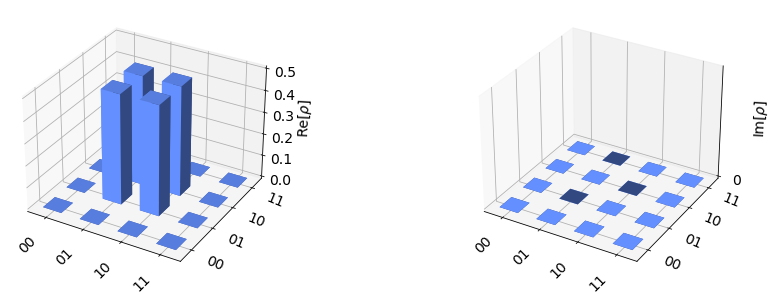

In [27]:
plot_state_city(qc)

In [28]:
backend2 = Aer.get_backend('unitary_simulator')
job = backend2.run(qc)
result = job.result()
print(result.get_unitary(qc, decimals = 3))

[[ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j]
 [ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j]]


In [29]:
meas = QuantumCircuit(2,2)
meas.barrier(range(2))
meas.measure(range(2),range(2))
             
qc.add_register(meas.cregs[0])
fc = qc.compose(meas)
fc.draw()

┌───┐      ░       ░ ┌─┐   
q_0: ┤ H ├──■───░───────░─┤M├───
     └───┘┌─┴─┐ ░ ┌───┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░─┤ X ├─░──╫─┤M├
          └───┘ ░ └───┘ ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

In [31]:
backend_sim = provider.get_backend(name="emulator")
job_sim = backend_sim.run(transpile(fc,backend_sim), shots = 1024)
result_sim = job_sim.result()

In [32]:
counts = result_sim.get_counts(fc)
print(counts)

{'10': 528, '01': 496}


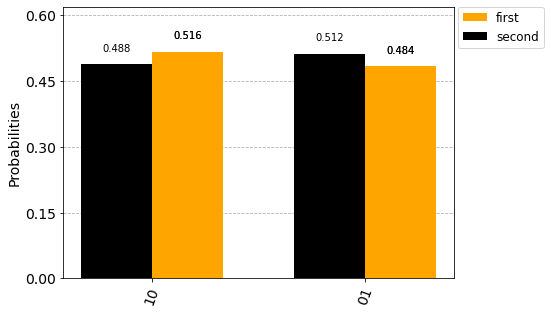

In [33]:
second_result = backend_sim.run(transpile(fc,backend),shots = 1024).result()
second_counts = second_result.get_counts(fc)
legend = ['first','second']
plot_histogram([counts,second_counts], legend = legend,sort='desc', color=['orange','black'])

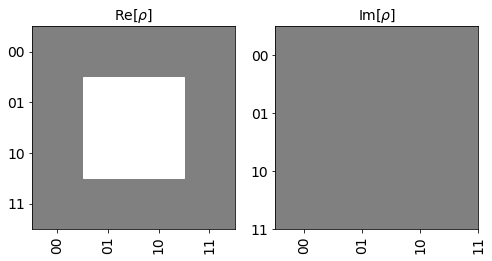

In [41]:
plot_state_hinton(qc)

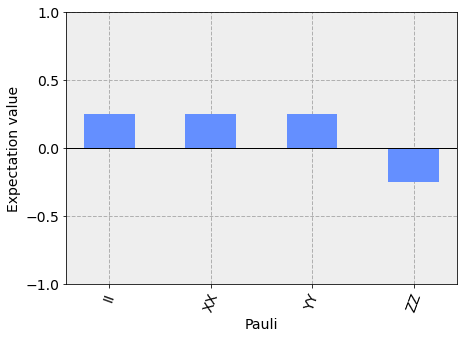

In [43]:
plot_state_paulivec(qc)

In [44]:
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('00')
sve = sv.evolve(qc)
sve.draw('latex')

<IPython.core.display.Latex object>